### THIS EXPERIMENT DESCRIBES ABOUT ADULT CENCUS DATA
     

####  Classifying Adult Income As Low or  High by using Two Class Logistic Regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
from azureml import Workspace 



/home/nbuser/anaconda3_23/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/nbuser/anaconda3_23/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


##### loading the data

In [4]:
wk= Workspace()
df=wk.datasets['Adult Census Income Binary Classification dataset']
adult=df.to_dataframe()

##### checking the adult data 


In [5]:
#checking the adult data
adult


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [43]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 9 columns):
age               32561 non-null int64
fnlwgt            32561 non-null int64
education-num     32561 non-null int64
marital-status    32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
hours-per-week    32561 non-null int64
income            32561 non-null int64
dtypes: int64(5), object(4)
memory usage: 2.2+ MB


In [9]:
adult.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [48]:
adult.describe()

,age,fnlwgt,education-num,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,40.437456
std,13.640433,1.055500e+05,2.572720,12.347429
min,17.000000,1.228500e+04,1.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99.000000


##### cleaning and transform data

In [6]:
 adult.drop(['workclass', 'education', 'occupation', 'capital-gain', 'capital-loss', "native-country"],axis=1,inplace=True )

In [7]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 9 columns):
age               32561 non-null int64
fnlwgt            32561 non-null int64
education-num     32561 non-null int64
marital-status    32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
hours-per-week    32561 non-null int64
income            32561 non-null object
dtypes: int64(4), object(5)
memory usage: 2.2+ MB


## visualizing the data

##### Plot categorical variables as bar plots

'Bar Plots'

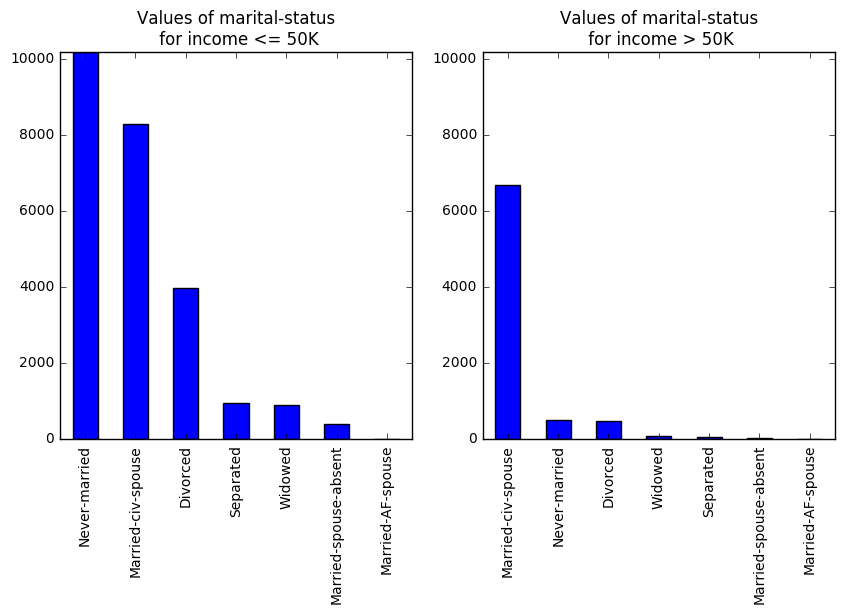

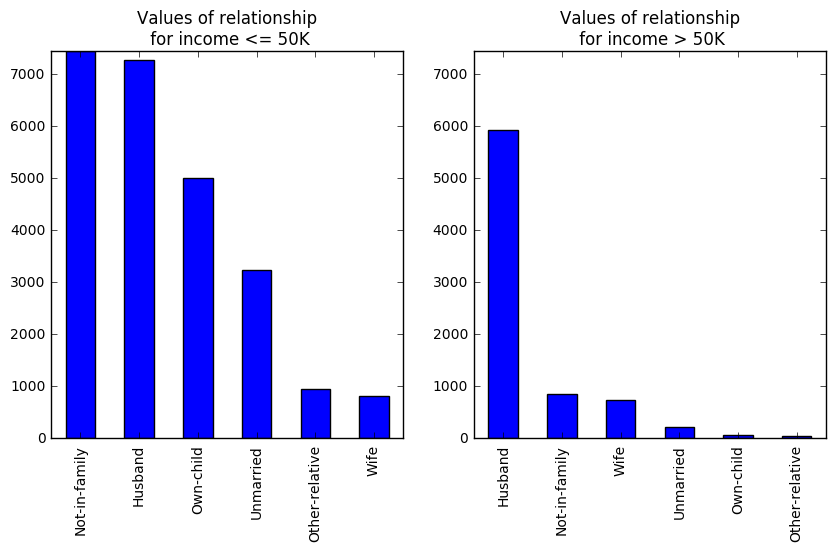

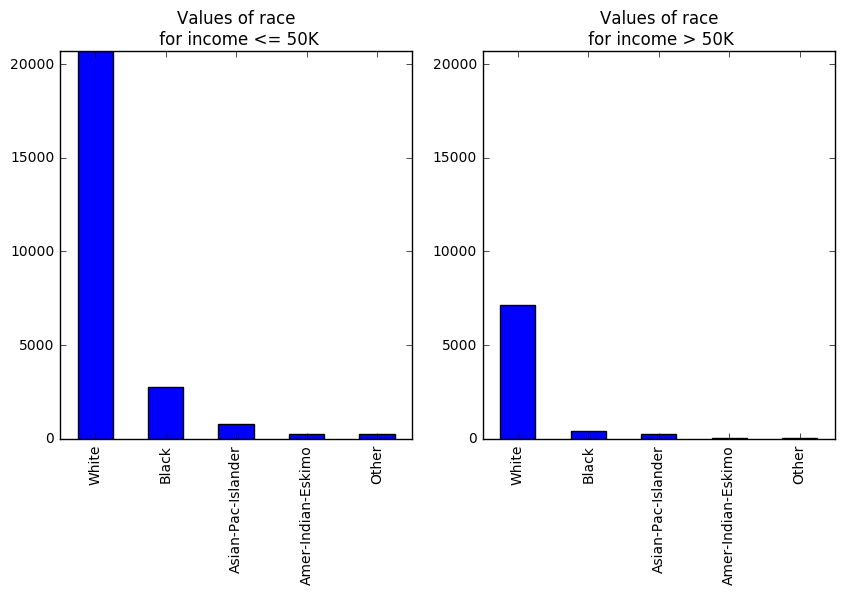

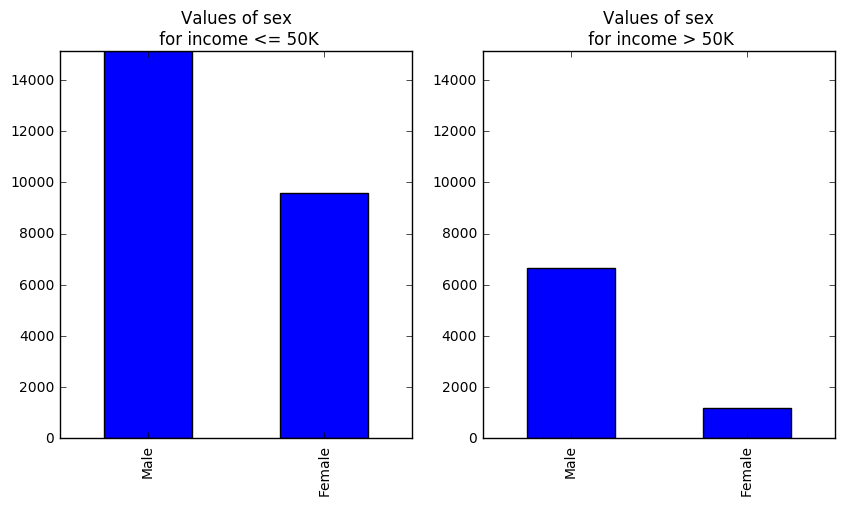

In [13]:

def income_barplot(adult):
    cols = adult.columns.tolist()[:-1]
    for col in cols:
        if(adult.ix[:, col].dtype not in [np.int64, np.int32, np.float64]):
            temp1 = adult.ix[adult['income'] == '<=50K', col].value_counts()
            temp0 = adult.ix[adult['income'] == '>50K', col].value_counts() 
            
            ylim = [0, max(max(temp1), max(temp0))]
            fig = plt.figure(figsize = (10,5))
            fig.clf()
            ax1 = fig.add_subplot(1, 2, 1)
            ax0 = fig.add_subplot(1, 2, 2) 
            temp1.plot(kind = 'bar', ax = ax1, ylim = ylim)
            ax1.set_title('Values of ' + col + '\n for income <= 50K')
            temp0.plot(kind = 'bar', ax = ax0, ylim = ylim)
            ax0.set_title('Values of ' + col + '\n for income > 50K')
    return('Bar Plots')        

income_barplot(adult)

##### Plot categorical variables as box plots

'Box Plots'

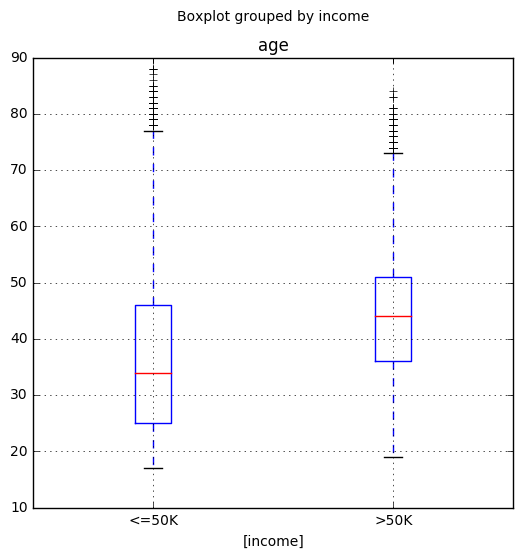

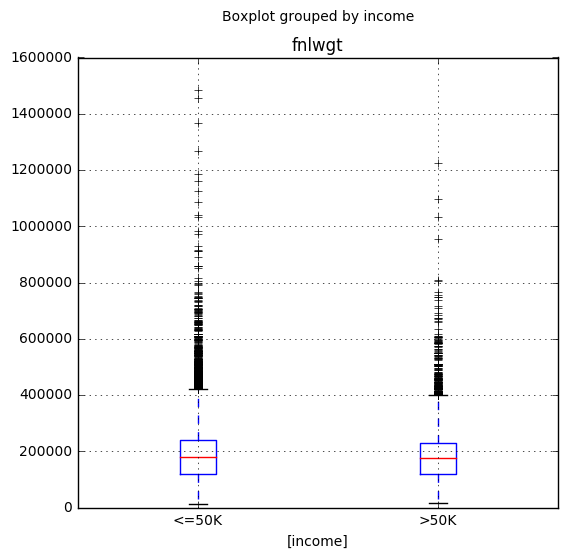

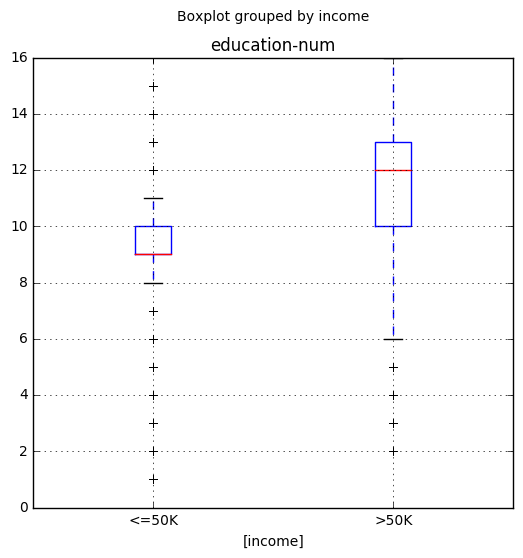

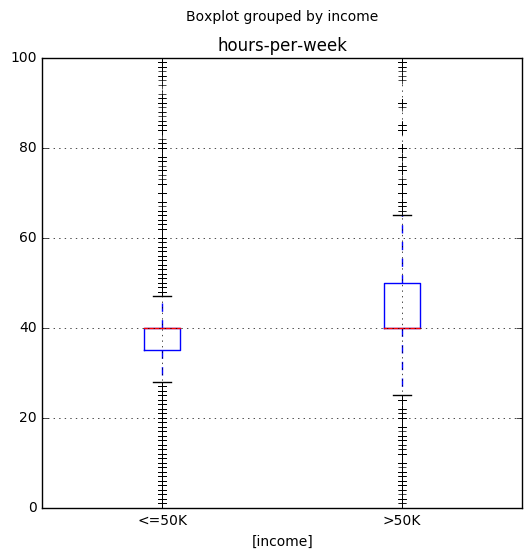

In [14]:

def income_boxplot(adult):
    cols = adult.columns.tolist()[:-1]
    for col in cols:
        if(adult[col].dtype in [np.int64, np.int32, np.float64]):                  
            fig = plt.figure(figsize = (6,6))
            fig.clf()
            ax = fig.gca() 
            adult.boxplot(column = [col], ax = ax, by = ['income'])          
    return('Box Plots') 

income_boxplot(adult)

##### normalizing data
 since all the numiric data  is int except income columan, leave as int

In [33]:
adult['income']=[1 if a=='<=50K'else 0 for a in adult['income']]

In [34]:
y=adult['income']
print(y)

0        1
1        1
2        1
3        1
4        1
5        1
6        1
7        0
8        0
9        0
10       0
11       0
12       1
13       1
14       0
15       1
16       1
17       1
18       1
19       0
20       0
21       1
22       1
23       1
24       1
25       0
26       1
27       0
28       1
29       1
        ..
32531    1
32532    0
32533    0
32534    1
32535    1
32536    0
32537    1
32538    0
32539    0
32540    1
32541    1
32542    1
32543    1
32544    1
32545    0
32546    1
32547    1
32548    1
32549    1
32550    1
32551    1
32552    1
32553    1
32554    0
32555    1
32556    1
32557    0
32558    1
32559    1
32560    0
Name: income, dtype: int64


In [50]:
x1= adult.iloc[:,:-1].values

In [47]:
print(x1)

[[39 77516 13 ..., 'White' 'Male' 40]
 [50 83311 13 ..., 'White' 'Male' 13]
 [38 215646 9 ..., 'White' 'Male' 40]
 ..., 
 [58 151910 9 ..., 'White' 'Female' 40]
 [22 201490 9 ..., 'White' 'Male' 20]
 [52 287927 9 ..., 'White' 'Female' 40]]


In [51]:
x1= pd.DataFrame(x1)

In [52]:
x1

,0,1,2,3,4,5,6,7
0,39,77516,13,Never-married,Not-in-family,White,Male,40
1,50,83311,13,Married-civ-spouse,Husband,White,Male,13
2,38,215646,9,Divorced,Not-in-family,White,Male,40
3,53,234721,7,Married-civ-spouse,Husband,Black,Male,40
4,28,338409,13,Married-civ-spouse,Wife,Black,Female,40
5,37,284582,14,Married-civ-spouse,Wife,White,Female,40
6,49,160187,5,Married-spouse-absent,Not-in-family,Black,Female,16
7,52,209642,9,Married-civ-spouse,Husband,White,Male,45
8,31,45781,14,Never-married,Not-in-family,White,Female,50
9,42,159449,13,Married-civ-spouse,Husband,White,Male,40


In [53]:
def prep_features(x1):
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = x1.index)

    # checking each feature column for the data
    for i, value in x.iteritems():

        # If data type is non-numeric, replace all male/female values with 1/0
        if value.dtype == object:
            value = value.replace(['male', 'female'], [1, 0])

        # If data type is categorical, convert to dummy variables
        if value.dtype == object:
            
            value = pd.get_dummies(value, prefix = i)

        # Collect the revised columns
        output = output.join(value)

    return output

x= prep_features(x1)

In [54]:
x

,0,1_?,1_Federal-gov,1_Local-gov,1_Never-worked,1_Private,1_Self-emp-inc,1_Self-emp-not-inc,1_State-gov,1_Without-pay,...,13_Portugal,13_Puerto-Rico,13_Scotland,13_South,13_Taiwan,13_Thailand,13_Trinadad&Tobago,13_United-States,13_Vietnam,13_Yugoslavia
0,39,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,50,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,37,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,49,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,52,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
8,31,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,42,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


#####  Splitting training and test sets

In [18]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=24)

##### fitting logistic regression to training set


In [19]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

##### predicting the test set result

In [20]:

y_pred = logreg.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [24]:
#checking prediction accuracy

confusion_matrix(y_test,y_pred)


array([[ 615, 1779],
       [ 238, 7137]])

In [27]:
accuracy = accuracy_score(y_test, y_pred)

In [28]:
accuracy

0.79353055583990173